In [1]:
import dlib

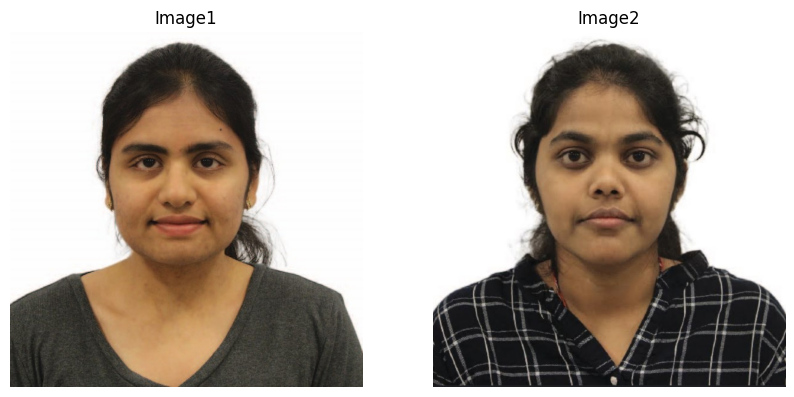

In [2]:
import cv2
from matplotlib import pyplot as plt

# Replace this with your actual file paths
damaged_image_path = 'damaged_face.jpg'
complete_image_path = 'complete_face.jpg'

# Load the damaged and complete images
damaged_image = cv2.imread(damaged_image_path)
complete_image = cv2.imread(complete_image_path)

# Convert images from BGR to RGB for displaying with matplotlib
damaged_image_rgb = cv2.cvtColor(damaged_image, cv2.COLOR_BGR2RGB)
complete_image_rgb = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB)

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(damaged_image_rgb)
axes[0].set_title('Image1')
axes[0].axis('off')

axes[1].imshow(complete_image_rgb)
axes[1].set_title('Image2')
axes[1].axis('off')

plt.show()


In [3]:
import cv2

# Replace these with the paths to your images
damaged_face_path = 'damaged_face.jpg'
complete_face_path = 'complete_face.jpg'

# Load the images
damaged_face = cv2.imread(damaged_face_path)
complete_face = cv2.imread(complete_face_path)

# Ensure both images were loaded correctly
if damaged_face is None or complete_face is None:
    raise ValueError("Could not load one or both images. Please check the file paths.")

# Get the dimensions to resize to (the smallest of the two images)
new_height = min(damaged_face.shape[0], complete_face.shape[0])
new_width = min(damaged_face.shape[1], complete_face.shape[1])

# Resize both images to the smallest dimensions
resized_damaged_face = cv2.resize(damaged_face, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
resized_complete_face = cv2.resize(complete_face, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Now you can save or display the resized images
cv2.imwrite('resized_damaged_face1.jpg', resized_damaged_face)
cv2.imwrite('resized_complete_face1.jpg', resized_complete_face)

True

#### Resized Both Images

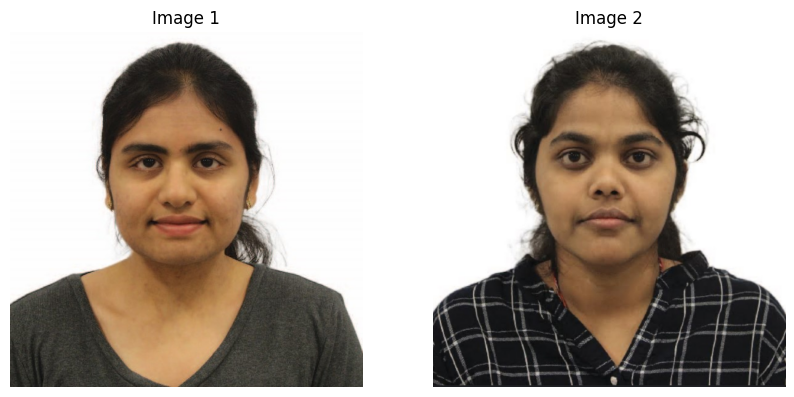

In [4]:
import cv2
import matplotlib.pyplot as plt

def read_and_resize_images(image_path1, image_path2):
    # Read the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Check if images are loaded
    if image1 is None or image2 is None:
        raise ValueError("One or both images didn't load.")

    # Resize images to match the smaller one
    new_height = min(image1.shape[0], image2.shape[0])
    new_width = min(image1.shape[1], image2.shape[1])

    resized_image1 = cv2.resize(image1, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    resized_image2 = cv2.resize(image2, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
    # Convert from BGR to RGB for displaying
    resized_image1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2RGB)
    resized_image2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)
    
    # Display the images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(resized_image1)
    plt.title('Image 1')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image2)
    plt.title('Image 2')
    plt.axis('off')
    
    plt.show()

# Paths to the images (you can change these to the correct paths for your images)
image_path1 = 'damaged_face.jpg'
image_path2 = 'complete_face.jpg'

# Call the function to read, resize, and display the images
read_and_resize_images(image_path1, image_path2)

### Outlining the face

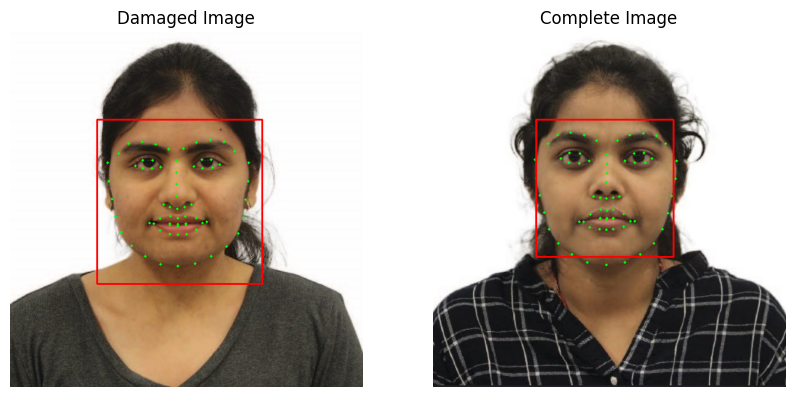

In [6]:
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_and_draw_faces(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = detector(gray, 1)

    # Loop over each detected face
    for face in faces:
        # Get the facial landmarks
        landmarks = predictor(gray, face)

        # Convert landmarks from dlib format to an array
        landmarks_array = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Draw circles on the landmarks
        for (x, y) in landmarks_array:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

        # Draw a rectangle around the face
        cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (0, 0, 255), 2)
    
    return image

# Replace this with your actual file paths
local_file_path = 'shape_predictor_68_face_landmarks.dat'
damaged_image_path = 'resized_damaged_face1.jpg'
complete_image_path = 'resized_complete_face1.jpg'

# Load the dlib face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(local_file_path)

# Load the damaged and complete images
damaged_image = cv2.imread(damaged_image_path)
complete_image = cv2.imread(complete_image_path)

# Detect and draw faces and facial landmarks on the damaged image
damaged_result = detect_and_draw_faces(damaged_image.copy())

# Detect and draw faces and facial landmarks on the complete image
complete_result = detect_and_draw_faces(complete_image.copy())

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(damaged_result, cv2.COLOR_BGR2RGB))
axes[0].set_title('Damaged Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(complete_result, cv2.COLOR_BGR2RGB))
axes[1].set_title('Complete Image')
axes[1].axis('off')

plt.show()


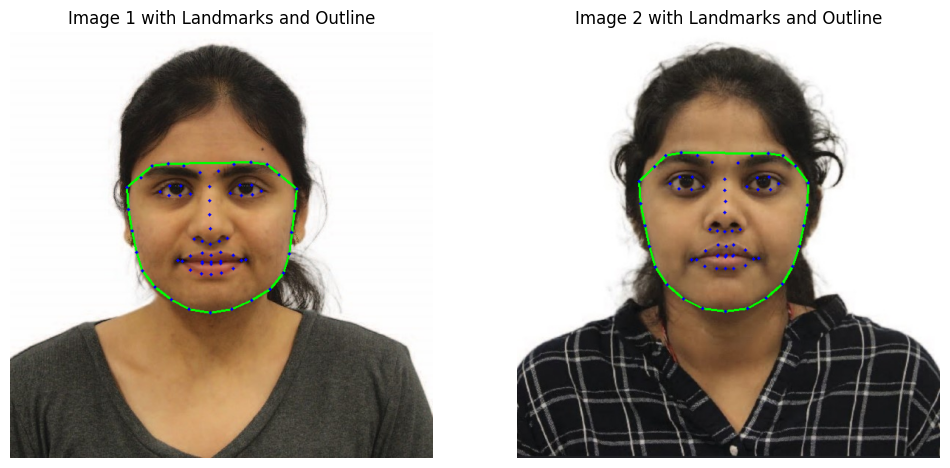

Size of outline 1: (230, 216) (width, height)
Size of outline 2: (230, 216) (width, height)


In [7]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Initialize dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def get_landmarks(image, detector, predictor):
    # Convert the image to grayscale, as the detector expects a grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use the detector to find the bounding box of the face
    faces = detector(gray)
    if len(faces) == 0:
        return None, None
    
    # Assume we are working with one face per image for simplicity
    face = faces[0]
    
    # Use the predictor to find the landmark points
    landmarks = predictor(gray, face)
    
    # Convert the landmark points to a 2D numpy array
    landmark_list = np.array([[p.x, p.y] for p in landmarks.parts()])
    
    # Find the convex hull of the landmarks to get the outline
    hull = cv2.convexHull(landmark_list)
    return landmark_list, hull

# Load the images
image1_path = 'resized_damaged_face1.jpg'  # Replace with your actual file path
image2_path = 'resized_complete_face1.jpg'  # Replace with your actual file path
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images were loaded
if image1 is None or image2 is None:
    raise ValueError("Could not load one or both images. Check the file paths.")

# Obtain landmarks and outlines for both images
landmarks1, outline1 = get_landmarks(image1, detector, predictor)
landmarks2, outline2 = get_landmarks(image2, detector, predictor)

# Check if landmarks were found
if landmarks1 is None or landmarks2 is None:
    raise ValueError("Could not find landmarks in one or both images.")

# Display the images with landmarks and outlines
image1_with_landmarks = image1.copy()
image2_with_landmarks = image2.copy()

# Draw landmarks and outlines on the images
cv2.polylines(image1_with_landmarks, [outline1], True, (0, 255, 0), 2)
for (x, y) in landmarks1:
    cv2.circle(image1_with_landmarks, (x, y), 2, (255, 0, 0), -1)

cv2.polylines(image2_with_landmarks, [outline2], True, (0, 255, 0), 2)
for (x, y) in landmarks2:
    cv2.circle(image2_with_landmarks, (x, y), 2, (255, 0, 0), -1)

# Convert the images to RGB for matplotlib display
image1_with_landmarks_rgb = cv2.cvtColor(image1_with_landmarks, cv2.COLOR_BGR2RGB)
image2_with_landmarks_rgb = cv2.cvtColor(image2_with_landmarks, cv2.COLOR_BGR2RGB)

# Display the images with landmarks and outlines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image1_with_landmarks_rgb)
plt.title('Image 1 with Landmarks and Outline')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2_with_landmarks_rgb)
plt.title('Image 2 with Landmarks and Outline')
plt.axis('off')
plt.show()

# Match the sizes of the outlines
outline1_rect = cv2.boundingRect(outline1)
outline2_rect = cv2.boundingRect(outline2)
x, y, w, h = outline2_rect

# Create an empty image with the same size as the bounding rectangle of outline1
outline1_resized = np.zeros((h, w, 3), dtype=np.uint8)

# Draw the outline on the empty image
cv2.polylines(outline1_resized, [outline1], True, (255, 255, 255), 2)

# Resize the outline1_resized to match the size of outline2
outline1_resized = cv2.resize(outline1_resized, (w, h))

# Display the sizes of the outlines
print("Size of outline 1:", outline1_resized.shape[1::-1], "(width, height)")
print("Size of outline 2:", outline2_rect[2:], "(width, height)")


### Improving the methodology :

###  The following code provides a complete example that implements these steps using an affine transformation for alignment and weighted averaging for blending:

Facial Landmark Detection:

Using dlib.get_frontal_face_detector() to detect faces in the images.
Using dlib.shape_predictor() with a pre-trained model to identify facial landmarks on the detected face. This returns specific points that represent key facial features (eyes, eyebrows, nose, mouth, jawline).
Affine Transformation:

An affine transformation matrix is computed using cv2.estimateAffinePartial2D(). This function calculates the transformation matrix that maps the source landmarks (points_src) to the destination landmarks (points_dst).
The affine transformation includes translation, rotation, scaling, and shearing to align the source image with the destination landmarks.
Image Warping:

cv2.warpAffine() applies the affine transformation to the source images, warping them to align with the average shape determined by the facial landmarks. This step ensures that the facial features in both images match in size, orientation, and position.
Weighted Averaging (Cross-Dissolve):

cv2.addWeighted() blends the two warped images based on a weight factor (alpha). This function performs a pixel-wise weighted sum of the two images. An alpha value of 0.5 results in an equal blend of both images.
Displaying the Image:

matplotlib.pyplot.imshow() and matplotlib.pyplot.show() are used to display the final morphed image within a Python environment. cv2.cvtColor() is used to convert the image from OpenCV's default BGR color space to RGB, which is the correct format for displaying with matplotlib.
The morphing process followed by this code includes aligning and then blending two facial images in a way that the features smoothly transition from one face to the other. This is a common technique used in various applications, including special effects in movies and creating composite images in photography or research.

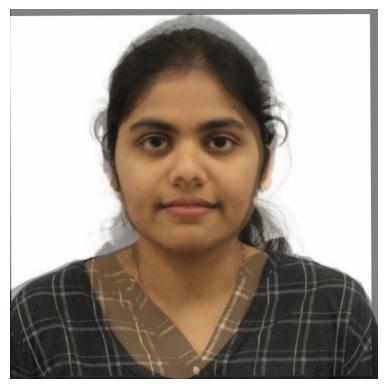

In [9]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def get_landmarks(image, detector, predictor):
    # Detect faces in the image
    detected_faces = detector(image, 1)
    if not detected_faces:
        raise ValueError("No faces detected in the image.")
    # Get the landmarks/parts for the face
    shape = predictor(image, detected_faces[0])
    return np.array([[part.x, part.y] for part in shape.parts()])

def warp_image(image, points_src, points_dst, shape):
    # Compute the transformation matrix
    matrix = cv2.estimateAffinePartial2D(points_src, points_dst)[0]
    # Warp the image using the matrix
    warped_image = cv2.warpAffine(image, matrix, shape, flags=cv2.INTER_LINEAR)
    return warped_image

def blend_images(image1, image2, alpha=0.5):
    # Weighted average of the two images
    return cv2.addWeighted(image1, alpha, image2, (1 - alpha), 0)

# Load images
image1 = cv2.imread('resized_damaged_face1.jpg')
image2 = cv2.imread('resized_complete_face1.jpg')

# Get landmarks for both images
landmarks1 = get_landmarks(image1, detector, predictor)
landmarks2 = get_landmarks(image2, detector, predictor)

# Compute average landmarks
average_landmarks = (landmarks1 + landmarks2) / 2

# Warp both images towards the average landmarks
warped_image1 = warp_image(image1, landmarks1, average_landmarks, image1.shape[:2][::-1])
warped_image2 = warp_image(image2, landmarks2, average_landmarks, image2.shape[:2][::-1])

# Perform the blending to create the morphed image
morphed_image = blend_images(warped_image1, warped_image2, alpha=0.5)

# Display the morphed image
plt.imshow(cv2.cvtColor(morphed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

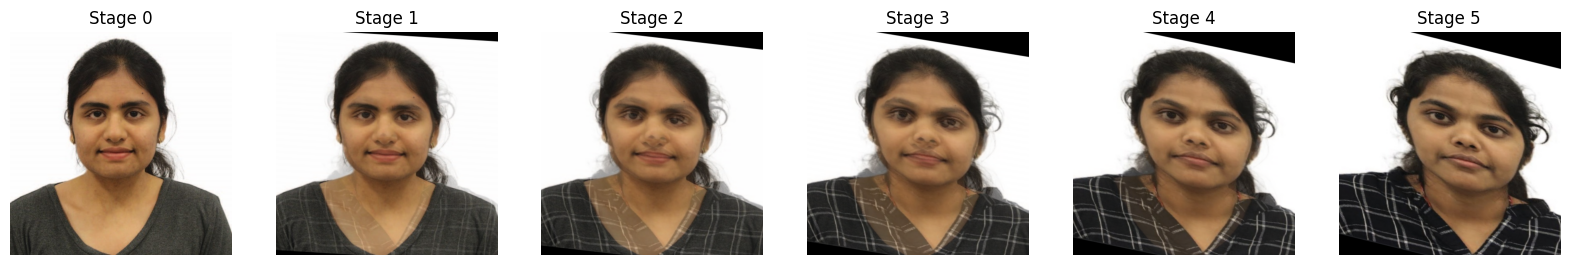

In [10]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Initialize dlib's face detector (HOG-based) and create the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Function to extract facial landmarks
def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return np.array([[p.x, p.y] for p in landmarks.parts()])
    return None

# Function to warp images based on intermediate landmarks
def morph_images(image1, image2, landmarks1, landmarks2, alpha):
    # Compute intermediate shape based on the blending parameter alpha
    intermediate_landmarks = (1 - alpha) * landmarks1 + alpha * landmarks2

    # Warp both images to match the intermediate shape
    # OpenCV's warpAffine function requires 3 pairs of points to calculate the affine transform
    # We use the first three non-collinear points we find in the landmarks
    # (In practice, you might want to select more robust points or use piecewise affine warping)
    src_pts = np.float32(landmarks1[:3])
    dst_pts = np.float32(intermediate_landmarks[:3])
    M = cv2.getAffineTransform(src_pts, dst_pts)

    # Apply the affine transformation
    warped_image1 = cv2.warpAffine(image1, M, (image1.shape[1], image1.shape[0]))
    warped_image2 = cv2.warpAffine(image2, M, (image2.shape[1], image2.shape[0]))

    # Blend the two warped images using the blending parameter alpha
    morphed_image = cv2.addWeighted(warped_image1, (1 - alpha), warped_image2, alpha, 0)

    return morphed_image

# Function to display a list of images
def display_images(images, titles):
    plt.figure(figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the images
image1 = cv2.imread('resized_damaged_face1.jpg')  # Replace with the path to your damaged face image
image2 = cv2.imread('resized_complete_face1.jpg')  # Replace with the path to your complete face image

# Get the landmarks for both images
landmarks1 = get_landmarks(image1)
landmarks2 = get_landmarks(image2)

# Define blending stages
num_stages = 5  # For example, 5 stages of transformation
images = []
titles = []

for stage in range(num_stages + 1):
    alpha = stage / num_stages
    morphed_image = morph_images(image1, image2, landmarks1, landmarks2, alpha)
    images.append(morphed_image)
    titles.append(f'Stage {stage}')

# Display the stages
display_images(images, titles)